# ANALYSIS OF THE  TMDB MOVIE DATASET TO GENERATE INSIGHTS 

## Table of Contents
<ul>
    <li><a href="#intro">Introduction and Aim of Analysis</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction: Dataset and Aim of the analysis.

> **ABOUT DATASET**:
>
> In this study, we will be analyzing a dataset of some movies released between 1960  and 2015. The dataset which was sourced from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?page=2) originally includes 10,866 movies and 21 columns such as movie Title, Genre, Casts, Release years, Budget and Revenue etc.  Our goal is to explore the relationships between these variables and answer certain questions. We will use various techniques and visualizations, including scatter plots, histograms and barcharts to gain insights into the data.

> **AIM OF ANALYSIS**
>
> The aim of the analysis is to investigate the dataset and gain insights from it in order to answer the following questions:
> <ul>
    > <li><a href="#eda">Q1</a> What genres are the Top3 most popular genres in the last year?</li>
    > <li><a href="#Q2">Q2:</a> Are more movies being produced in recent years than before? </li>
    > <li><a href="#Q3">Q3:</a> What are the most popular genres for each year of this century? </li>
    > <li><a href="#Q4">Q4:</a> Which movies are most popular from year to year? </li>
    > <li><a href="#Q5">Q5:</a> Who are the top most successful directors (of all time) in the movie industry. </li>
    > <li><a href="#Q6">Q6:</a> Do movies with lower runtime on average get more average rating from viewers? </li>
    > <li><a href="#Q7">Q7:</a> is there a relationship betweet the budget of a movie and revenue derived? </li>
> </ul>

In [2]:
# Importing all packages needed for my analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


###  Understanding the General Properties of our dataset.

In [3]:
# Loading our dataset 'tmdb-movies.csv'
# NB: The dataset has been preloaded to current directory, so loading by file path isn't necessary.

df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

####  **NB:** Our dataset contains 21 columns of which some are irrelevant to this current analysis, and thus will be dropped right away before proper exploration of the datatypes of columns in this dataset, null values and duplicate rows.

In [5]:
# Lets see a list of all the columns in this dataset, and fish out columns to drop
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
# dropping columns that are not irrelevant to this analysis

columns_to_drop = ['id','imdb_id','homepage','tagline','overview','release_date','keywords','cast','budget_adj','revenue_adj','vote_count']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015


In [7]:
# Rearranging the columns of the dataframe using the reindex() function.
df = df.reindex(columns=['original_title','genres','runtime','director','production_companies','vote_average','release_year','popularity', 'budget', 'revenue'])
df.head(1)

,original_title,genres,runtime,director,production_companies,vote_average,release_year,popularity,budget,revenue
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,32.985763,150000000,1513528810


### Proper investigation into Datatypes, missing values and duplicated rows.

In [8]:
# checking the datatypes of every column all at once. 

types_of_data = [("{}'s datatype is:".format(x), type(df[x][0])) for x in df.columns]
types_of_data

[("original_title's datatype is:", str),
 ("genres's datatype is:", str),
 ("runtime's datatype is:", numpy.int64),
 ("director's datatype is:", str),
 ("production_companies's datatype is:", str),
 ("vote_average's datatype is:", numpy.float64),
 ("release_year's datatype is:", numpy.int64),
 ("popularity's datatype is:", numpy.float64),
 ("budget's datatype is:", numpy.int64),
 ("revenue's datatype is:", numpy.int64)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10866 non-null  object 
 1   genres                10843 non-null  object 
 2   runtime               10866 non-null  int64  
 3   director              10822 non-null  object 
 4   production_companies  9836 non-null   object 
 5   vote_average          10866 non-null  float64
 6   release_year          10866 non-null  int64  
 7   popularity            10866 non-null  float64
 8   budget                10866 non-null  int64  
 9   revenue               10866 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 849.0+ KB


In [10]:
df.duplicated().sum()

1

In [11]:
df.isnull().sum()

original_title             0
genres                    23
runtime                    0
director                  44
production_companies    1030
vote_average               0
release_year               0
popularity                 0
budget                     0
revenue                    0
dtype: int64

In [12]:
df[df['revenue'] == 0].count()

original_title          6016
genres                  5993
runtime                 6016
director                5973
production_companies    5082
vote_average            6016
release_year            6016
popularity              6016
budget                  6016
revenue                 6016
dtype: int64

In [13]:
df[df['budget'] == 0].count()

original_title          5696
genres                  5674
runtime                 5696
director                5656
production_companies    4802
vote_average            5696
release_year            5696
popularity              5696
budget                  5696
revenue                 5696
dtype: int64

**OBSERVATIONS:**
>- We only have row of duplicated values in all fields.
>- There are 23 and 44 null values in the genre and director columns respectively.
>- The production comapanies column has over a thousand null values.
>- Nearly 6000 rows have zero value for Budget, and over 6000 rows have zero values for revenue.
>- The genre and production companies have multiple values separated by "|".

**ACTIONS TO BE TAKEN**
>- Dropping  rows with null values. Dropping duplicated rows is not necessary.
>- Popularity columns to be approximated to one decimal.
>- fields without values for genre, director and production companies will be all be dropped as these cannot be remedied.
>- each values in the genre  column will be expanded into separate rows, along with other items in the same field
>- Since the production company column is not necessary to this analysis, it shall be left unchanged.

### Thorough Data Cleaning 
#### Dropping null values

In [14]:
# dropping rows with null values
# second code checks for null value. Result should be false if there's none.

df.dropna(inplace=True)
df.isnull().sum().all()

False

#### Dropping rows where either budget or revenue columns have zero values.

In [15]:
df = df.drop(df[df['budget'] == 0].index)
df = df.drop(df[df['revenue'] == 0].index)
df.shape

(3808, 10)

In [16]:
# This is to reset row index numbers to avoid having missing numbers.
df = df.reset_index(drop=True)

#### Approximating the 'popularity' column.

In [17]:
# Approximating Popularity column using the round() method.
df['popularity'] = df['popularity'].round(1)
df.head(1)

,original_title,genres,runtime,director,production_companies,vote_average,release_year,popularity,budget,revenue
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,33.0,150000000,1513528810


In [18]:
df = df.rename(columns={"vote_average":"vote"})
df.head(1)

,original_title,genres,runtime,director,production_companies,vote,release_year,popularity,budget,revenue
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,33.0,150000000,1513528810


> **Now that our datatypes are in the correct format. We will go ahead to make structural changes to our dataframe. These include:**
> - Creating a new column (ROI) for the return on investment of the movies. We derive this from the budget and revenue columns.
> -Separate the contents of the genre column around the delimeter "|".

In [19]:
# Creating a column for Return on Investment (ROI)
df['ROI'] = df['revenue'] - df['budget']
df.head(2)

,original_title,genres,runtime,director,production_companies,vote,release_year,popularity,budget,revenue,ROI
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,33.0,150000000,1513528810,1363528810
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,120,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,28.4,150000000,378436354,228436354


#### NB: for the sake of simplicity, the values in the genre columns will be splitted around the delimiter "|". Then the first genre for each movie will be picked and the rest dropped. This is based on the assumption that the first genre in the list is the primary genre, while the rest are secondary genres.

In [20]:
# Keep the first genre in the list of genres for every movie, and drop the rest. 
split_columns = ['genres']
for column in split_columns: 
    df[column] = df[column].apply(lambda x: x.split("|")[0])
df.head()

,original_title,genres,runtime,director,production_companies,vote,release_year,popularity,budget,revenue,ROI
0,Jurassic World,Action,124,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,33.0,150000000,1513528810,1363528810
1,Mad Max: Fury Road,Action,120,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,28.4,150000000,378436354,228436354
2,Insurgent,Adventure,119,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,13.1,110000000,295238201,185238201
3,Star Wars: The Force Awakens,Action,136,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,11.2,200000000,2068178225,1868178225
4,Furious 7,Action,137,James Wan,Universal Pictures|Original Film|Media Rights ...,7.3,2015,9.3,190000000,1506249360,1316249360


In [21]:
df.shape

(3808, 11)

<a id='eda'></a>
## Exploratory Data Analysis

 
### Q1 What genres are the Top3 most popular genres in the last year?

In [22]:
# Initializing font sizes for all charts. This will be used througout the report.
fonts ={'title': 15, 'labels': 13, 'ticks':9 }

In [23]:
# Most popular genre in the last year
last_year = df.query('release_year == release_year.max()').iloc[:,np.r_[1,6,7]]
last_year_popular = last_year.groupby(['genres','release_year'], as_index=False).mean()
last_year_popular_sorted = last_year_popular.sort_values('popularity',ascending=False).round(1).head(3)
last_year_popular_sorted

,genres,release_year,popularity
15,Western,2015,9.1
0,Action,2015,6.3
14,War,2015,5.5


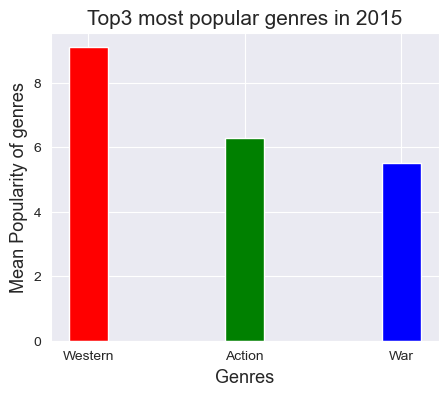

In [24]:
# plotting the graph for the most popular genres of last year
plt.figure(figsize=(5,4))
plt.bar(last_year_popular_sorted.genres, last_year_popular_sorted.popularity,width=0.25, color=['r','g','b'])
plt.ylabel('Mean Popularity of genres',fontsize=fonts['labels'])
plt.title('Top3 most popular genres in 2015',fontsize=fonts['title'])
plt.xlabel('Genres', fontsize=fonts['labels']);

<a id='Q2'></a>
### Q2: Are more movies being produced in recent years than before?

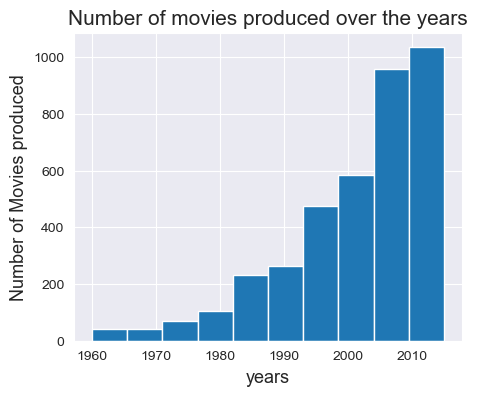

In [25]:
#A simple histogram plot of the release_year columns show number of movies produced in each year.

df.release_year.hist(figsize=(5,4))
plt.title('Number of movies produced over the years', fontsize=fonts['title'])
plt.xlabel('years', fontsize=fonts['labels'])
plt.ylabel('Number of Movies produced',fontsize=fonts['labels']);

> **It can be seen from the above histogram that the number of movies produced over the year has increased astronomically from 1960 to over 70X in 2015**


<a id='Q3'></a>
### Q3: What are the most popular genres for each year of this century?

In [26]:
# Getting the row index numbers of the most popular genres for each year since 2000

since_2000 = df.query('release_year >= 2000')
genre_year_group = since_2000.groupby(['release_year','genres'],as_index=False).mean().iloc[:,np.r_[0,1,4]]
arranged = genre_year_group.sort_values(['release_year','popularity'],ascending=False)

In [27]:
# Using the idxmax() function to retrive the index number that corresponds with the genre with the most mean popularity for each year
# This index numbers is converted to a list to be used in the following code.
to_list = list(arranged.groupby('release_year',as_index=True)['popularity'].idxmax())

most_popular_genres = genre_year_group.iloc[np.r_[to_list],:].round(1)
most_popular_genres

,release_year,genres,popularity
6,2000,Family,3.0
19,2001,Fantasy,3.6
29,2002,Animation,3.3
50,2003,Fantasy,3.5
73,2004,War,2.2
86,2005,Science Fiction,2.3
90,2006,Animation,1.9
106,2007,Adventure,2.1
134,2008,Science Fiction,2.3
139,2009,Animation,2.2


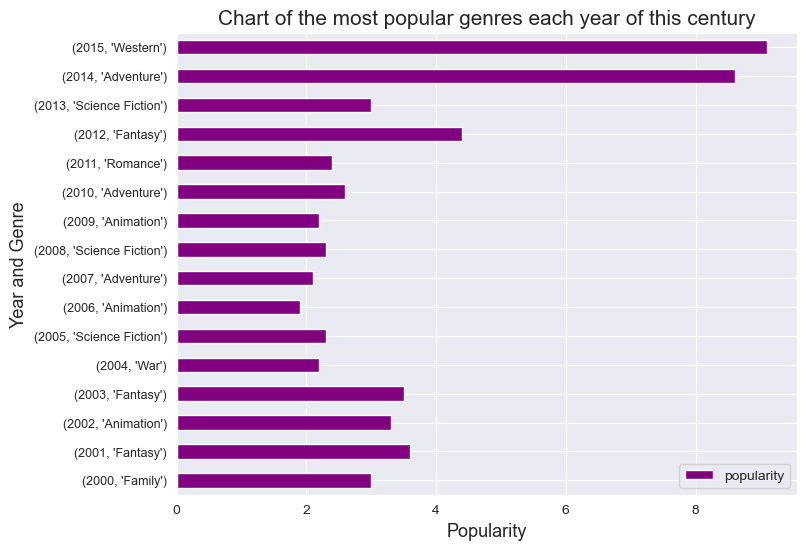

In [28]:
#Initializing variables
genre = list(most_popular_genres['genres'])
years = list(most_popular_genres['release_year'])
ylabel_names = list(zip(years,genre))
plot_column = ['genres','popularity']

most_popular_genres[plot_column].plot.barh(figsize=(8,6), color='purple')
plt.title('Chart of the most popular genres each year of this century', fontsize= fonts['title'])
plt.yticks(list(range(16)), ylabel_names,fontsize=fonts['ticks'])
plt.xlabel('Popularity',fontsize=fonts['labels'])
plt.ylabel('Year and Genre',fontsize=fonts['labels'])
plt.legend()
plt.show();

<a id="Q4"> </a>

### Q4: What movies are the highest grossing movies (having the most revenues)  from year to year?

In [29]:
# Lets get the row index numbers (as 'index_list' below) that corresponds to the movie with highest rating for each year.
year_groups = df.groupby('release_year')
max_revenue_rows = year_groups['revenue'].idxmax()

# Converting the row index number to a python list
index_list = list(max_revenue_rows)

highest_grossing_by_year = df.iloc[np.r_[index_list], np.r_[0,1,6,9]].sort_values('release_year',ascending =False).head(16)
highest_grossing_by_year

,original_title,genres,release_year,revenue
3,Star Wars: The Force Awakens,Action,2015,2068178225
165,The Hobbit: The Battle of the Five Armies,Adventure,2014,955119788
1838,Frozen,Animation,2013,1274219009
1470,The Avengers,Science Fiction,2012,1519557910
1089,Harry Potter and the Deathly Hallows: Part 2,Adventure,2011,1327817822
525,Toy Story 3,Animation,2010,1063171911
344,Avatar,Action,2009,2781505847
926,The Dark Knight,Drama,2008,1001921825
2558,Pirates of the Caribbean: At World's End,Adventure,2007,961000000
2218,Pirates of the Caribbean: Dead Man's Chest,Adventure,2006,1065659812


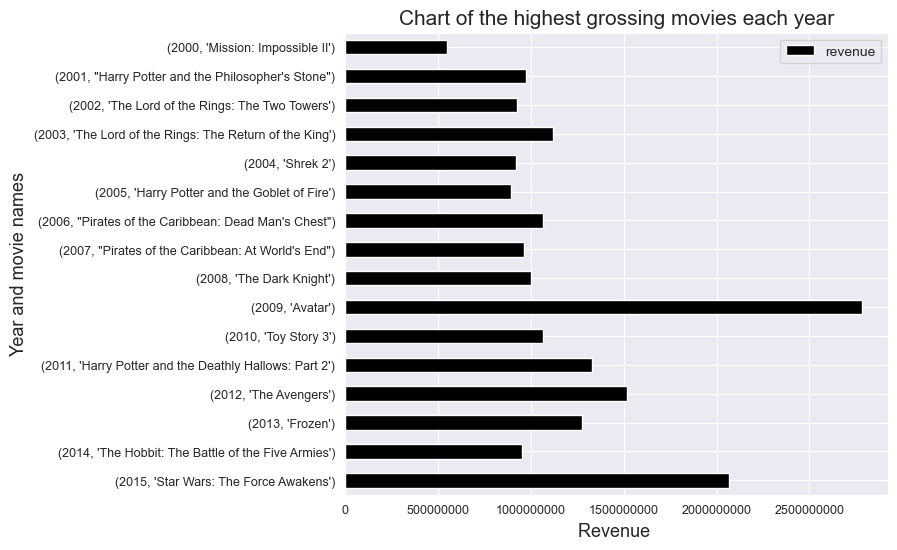

In [30]:
#Initializing variables
movie_names = list(highest_grossing_by_year['original_title'])
years_list = list(highest_grossing_by_year['release_year'])
ylabel_names = list(zip(years_list,movie_names))
column_to_plot = ['original_title','revenue']

# Plotting on an horizontal bar chart using initialized variables
highest_grossing_by_year[column_to_plot].plot.barh(figsize=(7,6), color='black')
plt.title('Chart of the highest grossing movies each year', fontsize= fonts['title'])
plt.yticks(list(range(16)), ylabel_names,fontsize=9)
plt.xticks(fontsize=fonts['ticks'])
plt.xlabel('Revenue ',fontsize=fonts['labels'])
plt.ylabel('Year and movie names',fontsize=fonts['labels'])
plt.ticklabel_format(style='plain',axis='x')
plt.legend()
plt.show()

<a id="Q5"></a>

### Q5: Who are the top most successful directors (of all time) in the movie industry.

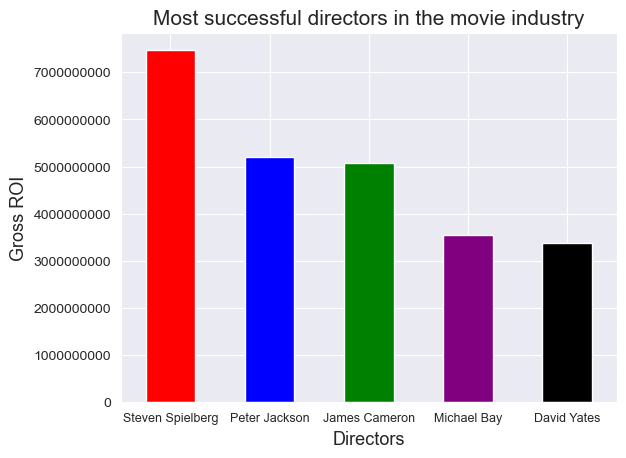

In [31]:
# Lets get the Top 5 names of all Directors and how much ROI their movies have accumulated the most Return on Investment
successful_directors = df.groupby('director')['ROI'].sum().sort_values(ascending=False).head()

#plotting using matplotlib
colors = ['red','blue','green','purple','black']

successful_directors.plot(kind='bar', color=colors)
plt.title('Most successful directors in the movie industry',fontsize=fonts['title'])
plt.ylabel('Gross ROI',fontsize=fonts['labels'])
plt.xlabel('Directors', fontsize=fonts['labels'])
plt.xticks(rotation = 360, fontsize=fonts['ticks'])
plt.ticklabel_format(style='plain', axis='y');

<a id="Q6"></a>

### Q6: Do movies with lower runtime on average get better average rating from viewers?

In [32]:
# lets get the mean lenght of a movie
df.runtime.mean()

109.34637605042016

In [33]:
# Using pandas query to derive two separate datasets for long and short movies.
short_movies = df.query('runtime < 109.35')
long_movies = df.query('runtime >= 109.35')

short_mean_vote = short_movies.vote.mean()
long_mean_vote = long_movies.vote.mean()

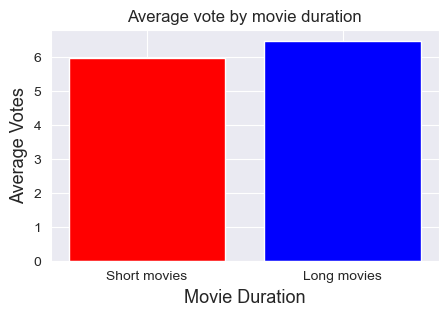

In [34]:
# Creating visuals
bar_colors = ['red','blue']
locations = [1, 2]
heights = [short_mean_vote, long_mean_vote]
labels = ['Short movies','Long movies']

plt.figure(figsize=(5,3))
plt.bar(locations,heights, color = bar_colors, tick_label = labels)
plt.title('Average vote by movie duration')
plt.ylabel('Average Votes',fontsize=fonts['labels'])
plt.xlabel('Movie Duration', fontsize=fonts['labels']);

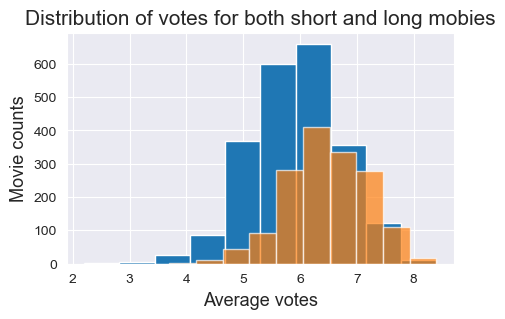

In [35]:
# To get an idea of the distribution of votes for the short and long movies category.

short_movies.vote.hist(figsize=(5,3),alpha=1),
long_movies.vote.hist(figsize=(5,3), alpha=0.7)
plt.title('Distribution of votes for both short and long mobies',fontsize=fonts['title'])
plt.ylabel('Movie counts',fontsize=fonts['labels'])
plt.xlabel('Average votes', fontsize=fonts['labels']);

**We can see from the movie distribution of the histogram above that more movies fall into our short movie category**

<a id="Q7"></a>

### Q7: Is there a relationship betweet the budget of a movie and revenue derived?

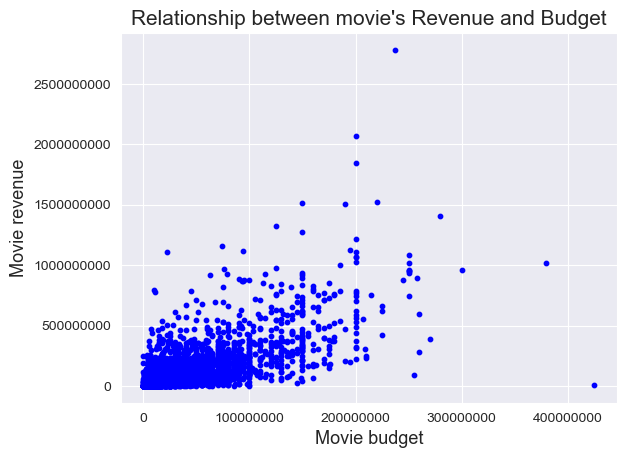

In [36]:
# let's see if there is a correlation between the budget and revenue of a movie.
movie_budgets = df['budget']
movie_revenues = df['revenue']

plt.scatter(movie_budgets,movie_revenues,s=10, color='b')
plt.ticklabel_format(style="plain", axis='both')
plt.title("Relationship between movie's Revenue and Budget",fontsize=fonts['title'])
plt.xlabel("Movie budget",fontsize=fonts['labels'])
plt.ylabel("Movie revenue",fontsize=fonts['labels']);

<a id='conclusions'></a>
## Conclusions



**In conclusion, my analysis of the TMDb Movie data gave us some great insignt into the dataset. These include:**

a. The Western, War and Action genres are the most popular genres among viewers in 2015.

b. It can be seen from the distribution of movie by release year that the number of movies produced has increased greatly between 1960 and 2015.

c. Our analysis also show that Steven Spielberg, Peter Jackson, James Cameron , among others, have been the most successful Directors of all time. Their movies have raked in the most return on investment over the years.

d. It can also be noted that longer movies generally get more average votes from users. The reason for this is quite unsure from this analysis, and is beyond it's scope.

e. Lastly, there is a positive correlation between a movie's allocated budget and the revenue derived from the movie
